<a href="https://colab.research.google.com/github/htapiagroup/manipulacion-de-datos-con-pandas-EisaacJC/blob/master/notebooks/01.05-Computation-on-arrays-broadcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img align="left" style="padding-right:10px;" src="https://www.uv.mx/ffia/files/2012/09/playerLogo2.jpg">

El contenido ha sido adaptado para el curso de Introducción a la ciencia de Datos,
por HTM y GED a partir del libro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) 
de Jake VanderPlas y se mantiene la licencia sobre el texto, 
[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), 
y sobre el codigo [MIT license](https://opensource.org/licenses/MIT).*

<!--NAVIGATION-->
< [Agregaciones: Min, Max, etc.](01.04-Computation-on-arrays-aggregates.ipynb) | [Contenido](Index.ipynb) | [Comparaciones, máscaras y lógica booleana](01.06-Boolean-Arrays-and-Masks.ipynb) >


# Cálculos con Arrays 2. Broadcasting

## Introducción a Broadcasting


In [0]:
import numpy as np

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [3]:
a + 5

array([5, 6, 7])

In [4]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [7]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

![Broadcasting Visual](https://github.com/htapiagroup/manipulacion-de-datos-con-pandas-EisaacJC/blob/master/notebooks/figures/02.05-broadcasting.png?raw=1)

## Reglas del Broadcasting

- Regla 1: Si dos arreglos son diferentes en el numero de sus dimensiones, la forma de la que tiene la menor dimension es adoptada con la que tiene a su izquierda
- Regla 2: Si la forma de los dos arreglos no conincide en sus dimensiones, el arreglo con forma igual a 1 es redimencionado para que conincida el otro arreglo
- Regla 3: Si los tamaños de las dimenciones no coinciden y ninguno es igual a 1, nos genera un error.

Para aclarar estas reglas, consideraremos algunos ejemplos con detalle.

### Broadcasting ejemplo 1


In [0]:
M = np.ones((2, 3))
a = np.arange(3)

Vamos a considerar una operacion con estos dos arreglos. La forma de los arreglos son

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

Vemos que el arreglo ``a`` cumple la regla 1 ya que tiene menos dimensiones, asi que se rellena a la izquierda con unos(1):

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

Para la regla 2, Ahora se observa que la primer dimension no concuerda con el otro arreglo, Por lo que cambiamos esta dimension para que coincida:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

Las formas coninciden, y vemos que la forma final sera ``(2, 3)``:

In [9]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting ejemplo 2


In [0]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Nuevamente, comenzamos escribiendo la forma de los arreglos:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

La regla 1 dice que debemos rellenar la forma de ``b`` con unos(1):

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

Y la regla 2 nos dice que actualizemos cada uno de estos para que coincidan con el tamaño correspondiente del otro arreglo:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Por que el resultado coincide, Estas formas son compatibles. Podemos ver esto aqui:

In [11]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting ejemplo 3


In [0]:
M = np.ones((3, 2))
a = np.arange(3)

Esta es solo una situacion ligeramente diferente que en el primer ejemplo:la matriz ``M`` se transpone.
Como afecta esto al calculo? la forma de los arreglos son

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Nuevamente, la regla 1 nos dice que debemos rellenar la forma de ``a`` con unos(1):

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

La regla 2, la primer dimension de ``a`` se actualiza para que coincida con la de ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Ahora llegamos a la regla 3: las formas finales no coinciden, por lo que estos dos arreglos son incompatibles, como podemos observar al intentar esta operacion:

In [13]:
M + a

#Esto sucede porque no se puede llevar a cabo la suma de matrices de dimensiones
#distintas

ValueError: ignored

Tenga en cuenta la posible confusion aqui: podria imaginarse hacer que ``a`` y ``M`` sean compatibles, por ejemplo, rellenando la forma de ``a`` con unos(1) a la derecha en lugar de la izquierda.
Pero no es asi como funcionan las reglas de broadcasting!
Este tipo de flexibilidad podria ser util en algunos casos, pero conduciria a posibles areas de ambiguedad.
Si lo que desea es el relleno de lado derecho, puede hacerlo reformulando explicitamente el arreglo usando la palabra clave np.newaxis introducida en [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb)):

In [14]:
a[:, np.newaxis].shape

(3, 1)

In [15]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

Tambien tenga en cuenta que si bien nos hemos centrado en el operador ``+`` aqui, las reglas de broadcasting son aplicadas *cualquier* funcion binaria.
Por ejemplo, aqui esta la funcion ``logaddexp(a, b)`` , que calcula el ``log(exp(a) + exp(b))`` con mas precision que el enfoque por aproximacion:

In [16]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

Para mas informacion sobre las muchas funciones universales disponibles, referenciada en [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb).

## Broadcasting en práctica

### Centralidad. Subtraer el promedio de un array

In [0]:
X = np.random.random((10, 3))

In [18]:
Xmean = X.mean(0)
Xmean

array([0.6662706 , 0.54733655, 0.40310199])

In [0]:
X_centered = X - Xmean

In [20]:
X_centered.mean(0)

array([-1.22124533e-16, -4.44089210e-17,  0.00000000e+00])

### Graficando una funcion en dos dimensiones

In [0]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

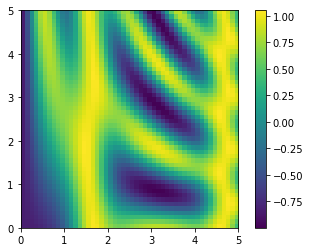

In [23]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

<!--NAVIGATION-->
< [Agregaciones: Min, Max, etc.](01.04-Computation-on-arrays-aggregates.ipynb) | [Contenido](Index.ipynb) | [Comparaciones, máscaras y lógica booleana](01.06-Boolean-Arrays-and-Masks.ipynb) >

